# Reconocimiento de dígitos

En el siguiente Notebook se implementará una de las técnicas del Machine Learning para poder identificar correctamente los dígitos de un conjunto de datos de **MNIST** (Modified National of Standards and Technology) que contiene miles de imágenes escritas a mano. Específicamente aplicaremos **CNN** (Convolutional Neural Network) o también conocidas como Redes Neuronales Convolucionales.

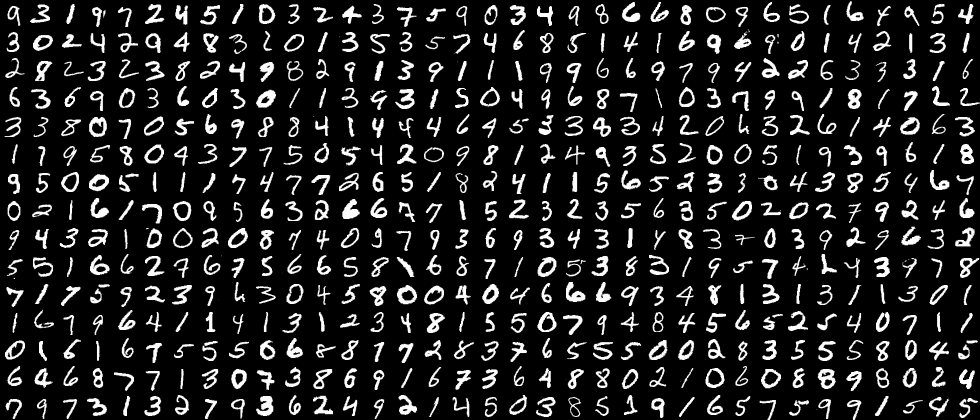

### Importamos las librerías a utilizar

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

### Realizamos la carga de datos

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Conjunto de entrenamiento: {}'.format(df_train.shape))
print('Conjunto de prueba: {}'.format(df_test.shape))

Conjunto de entrenamiento: (42000, 785)
Conjunto de prueba: (28000, 784)


Observamos si alguno de los conjuntos de datos poseen datos faltantes

In [19]:
print('Datos nulos en conjunto de entrenamiento: ', df_train.isnull().any().value_counts())
print('Datos nulos en conjunto de prueba: ', df_test.isnull().any().value_counts())

Datos nulos en conjunto de entrenamiento:  False    785
dtype: int64
Datos nulos en conjunto de prueba:  False    784
dtype: int64


In [20]:
# Separamos los datos que van a utilizarse para entrenamiento
X_train = df_train.drop(['label'], axis=1)
y_train = df_train['label']

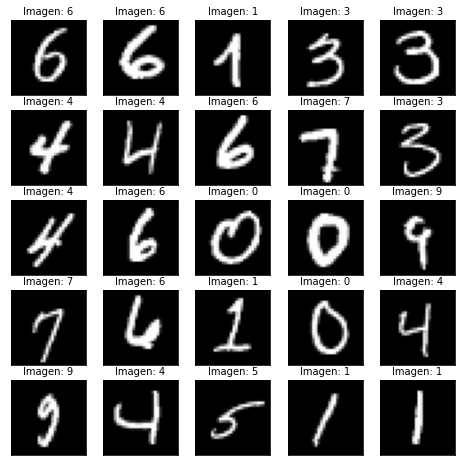

In [21]:
# Ploteamos algunas imágenes
fig = plt.figure(figsize=(8,8))
for i in range(25):
    j = np.random.randint(0, X_train.shape[0])
    plt.subplot(5,5,i+1)
    plt.imshow(X_train.iloc[j,:].values.reshape(28,28), cmap='gray')
    plt.title('Imagen: {}'.format(y_train[j]), fontsize=10)
    plt.xticks([])
    plt.yticks([])
plt.show()

Vemos cómo se distribuyen en cantidad las clases de dígitos

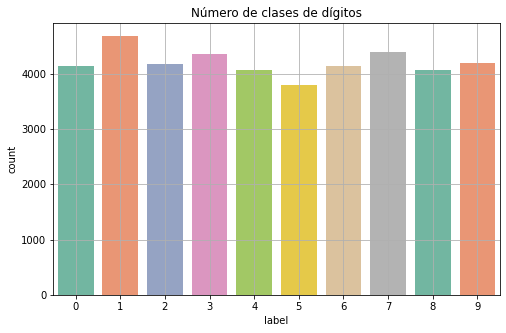

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(y_train, palette='Set2')
plt.title('Número de clases de dígitos')
plt.grid()

### Normalización de los datos

Debido a que los píxeles de las imágenes van de valores entre 0-255, realizamos una normalización de los datos para tener valores que vayan entre 0 y 1.

In [29]:
# Normalizamos los datos para que se encuentren en rango 0-1
X_train = X_train/255.0
test = df_test/255.0

### Transformación de los datos

Realizamos un reshape de nuestro conjunto de datos:
* Las imágenes tienen una dimensión de (28 x 28)
* Keras necesita una dimensión extra la cual corresponde al canal. En nuestro caso como las imágenes se encuentran en una escala de grises el canal es 1, en caso de que se encontraran en rgb el canal sería 3.
* Por otra parte convertimos las clases de dígitos en variables categóricas. Establecemos un número de clases igual a 10 ya que los dígitos van del 0 al 9.

In [30]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Convertimos los datos de y_train en datos categoricos, elegimos 10 clases ya que los numeros van del 1 al 9
y_train = to_categorical(y_train, num_classes=10)

### División en conjunto de entrenamiento y conjunto de prueba

* **Test size** -> 10%
* **Train size** -> 90%

In [31]:
# Dividimos los datos en train y set para luego construir el modelo
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

## Modelo CNN
* Creamos el modelo
    * Conv2D -> MaxPool2D -> Dropout -> Conv2D -> MaxPool2D -> Dropout -> Fully connected (2 capas)

In [32]:
# Modelo
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compilación de modelo

In [42]:
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [43]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamos el modelo

In [44]:
epochs = 2
batch_size = 64

In [45]:
history = model.fit(X_train, y_train, batch_size= batch_size, epochs=epochs,
                   validation_data = (X_test,y_test), verbose=1)

Epoch 1/2
591/591 [==============================] - 167s 223ms/step - loss: 0.5276 - accuracy: 0.8289 - val_loss: 0.0720 - val_accuracy: 0.9788
Epoch 2/2
591/591 [==============================] - 125s 212ms/step - loss: 0.0881 - accuracy: 0.9714 - val_loss: 0.0492 - val_accuracy: 0.9840


## Data Augmentation (Aumento de datos)

Para evitar el problema de sobreajuste, necesitamos expandir artificialmente nuestro conjunto de datos de dígitos escritos a mano. Debemos realizar pequeñas transformaciones a los datos de entrenamiento como por ejemplo si el número no está centrado, la imagen está rotada o la escala no es la misma, entre otras.

In [46]:
datagen = ImageDataGenerator(
    shear_range=0.3, # Recortar la imagen en un 30%
    zoom_range=0.1, # Zoom aleatorio de un 10%
    rotation_range=8, # Rotación aleatoria de la imagen en el rango de los 8 grados
    width_shift_range=0.1, # Desplazamiento aleatorio horizontal de la imagen de un 10%
    height_shift_range=0.1 # Desplazamiento aleatorio vertical de la imagen de un 10%
)

datagen.fit(X_train)

In [47]:
# Entrenamos el modelo
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data = (X_test,y_test),
                              verbose=1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/2
590/590 [==============================] - 138s 233ms/step - loss: 0.1687 - accuracy: 0.9481 - val_loss: 0.0402 - val_accuracy: 0.9883
Epoch 2/2
590/590 [==============================] - 154s 262ms/step - loss: 0.1032 - accuracy: 0.9682 - val_loss: 0.0312 - val_accuracy: 0.9907


## Matriz de confusión

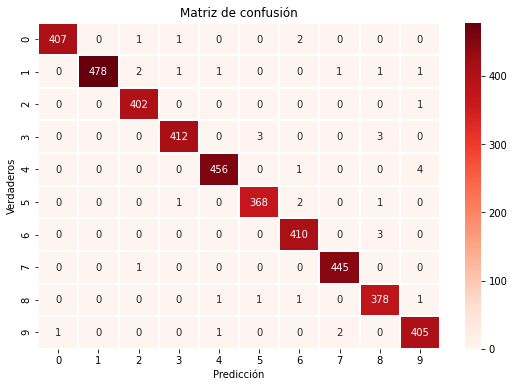

In [50]:
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(Y_true, Y_pred_classes)

class_label = range(10)
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm,annot=True,cmap='Reds',linewidths=2,fmt='d')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.show()

## Predicción de resultados

In [52]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

## Envío de predicciones a Kaggle

In [53]:
submissions = pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis=1)
submissions.to_csv('CNN-model.csv', index=False)